In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

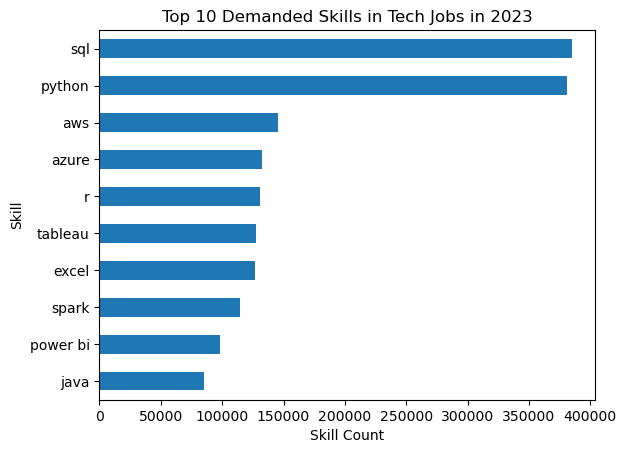

In [9]:
df_explode = df.copy()
df_explode = df_explode.explode('job_skills')
df_explode['job_skills'].value_counts(ascending=True).tail(10).plot(kind='barh')
plt.xlabel('Skill Count')
plt.ylabel('Skill')
plt.title('Top 10 Demanded Skills in Tech Jobs in 2023')
plt.show()

In [14]:
skills_count = df_explode.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values('skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


In [15]:
job_title = 'Data Analyst'
top_skills = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skills_final

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


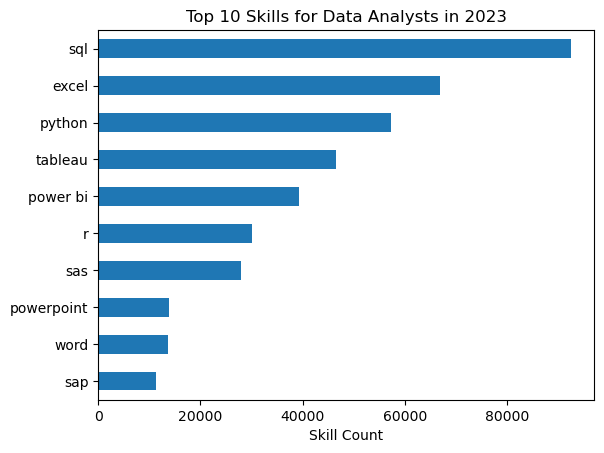

In [24]:
df_skills_final.plot(kind='barh', x='job_skills', y = 'skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} Skills for {job_title}s in 2023')
plt.ylabel('')
plt.xlabel('Skill Count')
plt.legend().set_visible(False)
plt.show()